# ALGORISME SEGMENTACIO MATRICULA

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import imutils
import argparse

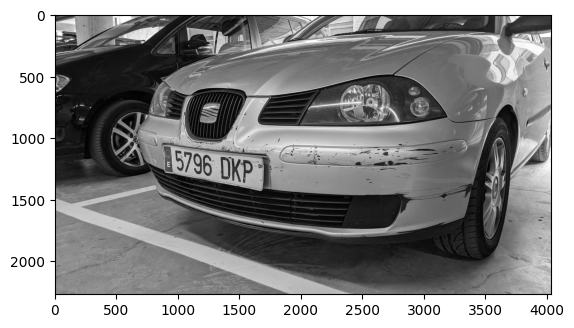

In [2]:
#llegir imatge i mostrar
base= "/Users/carlotacortes/Desktop/fotosmatricukes" #directori charli
image = cv2.imread(f"{base}/imagen1.jpg")
#convert to grayscale per després
grayimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap="gray")
plt.show()

### BLACKHAT

The license plate is bright since it’s a white region against a dark background of the car itself. An excellent starting point to finding the region of a license plate would be to use the top hat operator.
A top hat operation is used to reveal bright regions of an image on dark backgrounds.

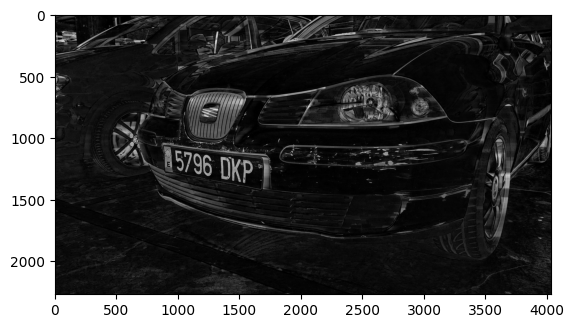

In [3]:
##definir un rectangular structuring element (kernel) with w=13, h=5. 
##aquests numeros perque normalment una matricula es 3 vegades w del h. 
rectKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))
#find dark regions on a light blackground
blackhat = cv2.morphologyEx(grayimg, cv2.MORPH_BLACKHAT, rectKernel, iterations=5)
#find light regions on a dark background
#tophat = cv2.morphologyEx(grayimg, cv2.MORPH_TOPHAT, rectKernel, iterations=10)

plt.imshow(blackhat, cmap="gray")
#plt.imshow(tophat, cmap="gray") 
plt.show()

### Scharr gradient + normalization

The Scharr gradient will detect edges in the image and emphasize the boundaries of the characters in the license plate. 

Using cv2.Sobel, we compute the Scharr gradient magnitude representation in the x-direction of our blackhat image. We then scale the resulting intensities back to the range [0, 255] 

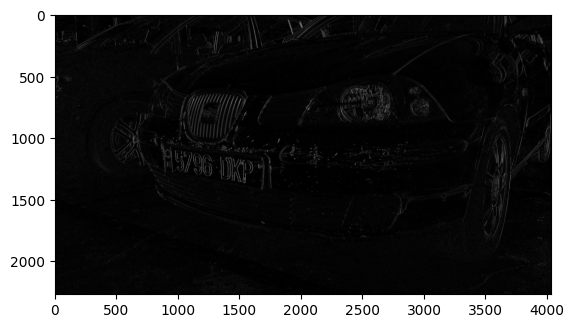

In [4]:
gradX = cv2.Sobel(blackhat, ddepth=cv2.CV_32F, dx=1,dy=0, ksize=-1)

gradX = np.absolute(gradX)
(minVal, maxVal) = (np.min(gradX), np.max(gradX))
gradX = (255 * ((gradX - minVal) / (maxVal - minVal))).astype("uint8")

plt.imshow(gradX, cmap="gray")
plt.show()


### FIND REGIONS THAT ARE LIGHT: CLOSE AND THRESHOLD

blur the gradient representation = closing. 

then threshold the image using OTsu's method

Using a small square kernel, we apply a closing operation to fill small holes and help us identify larger structures in the image. 
Then perform binary threshold (automatic method=OTSU) per revelar the light regions que poden contenir els numeros

THRESHOLDING: It allows us to separate the foreground (what we are interested) from the background.
IT IS A BINARIZATION OF AN IMAGE !!!
SEEK to converge grayscale image to a binary image (pixels are 0 or 255). On requereix una T per com limit decisio. 

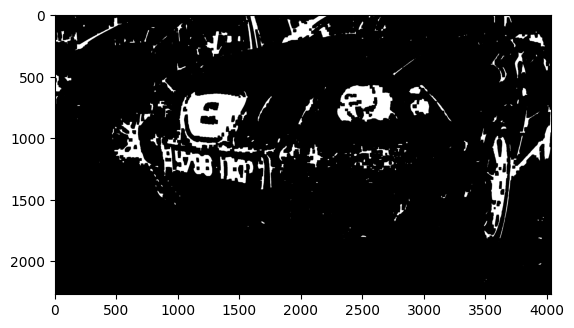

In [10]:
#blur
gradX = cv2.GaussianBlur(gradX, (5, 5), 0)
#close 
squareKern = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
gradX = cv2.morphologyEx(gradX, cv2.MORPH_CLOSE, squareKern, iterations=5)
#threshold
thresh = cv2.threshold(gradX, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU) [1]
plt.imshow(thresh, cmap="gray")
plt.show()

### Denoise threshold image = erode and dilate

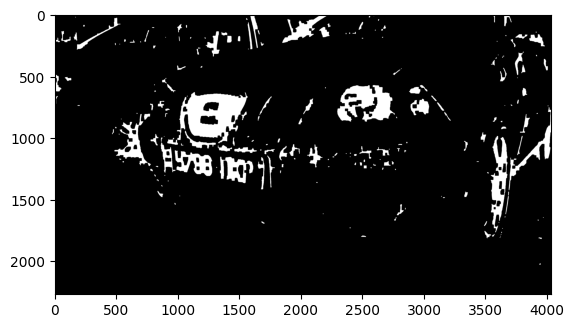

In [11]:
#clean up
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)
plt.imshow(thresh, cmap="gray")
plt.show()